
[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


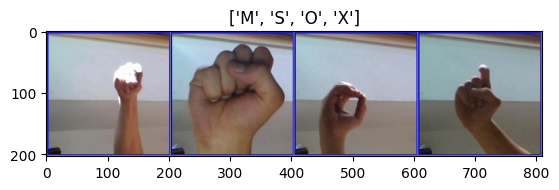

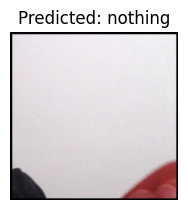

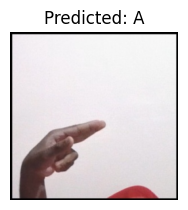

A


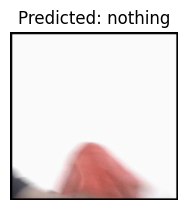

A


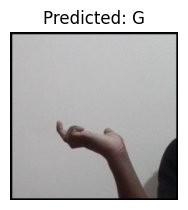

AG


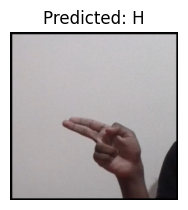

AGH


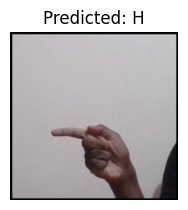

AGHH


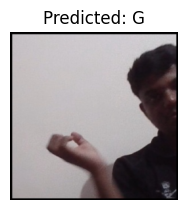

AGHHG


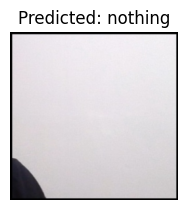

AGHHG


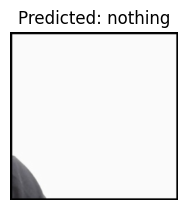

AGHHG


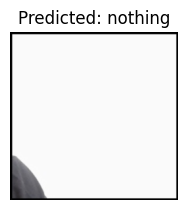

AGHHG


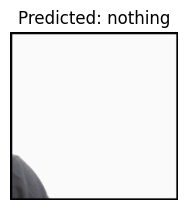

AGHHG


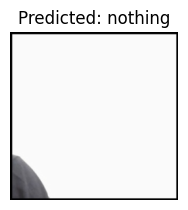

AGHHG


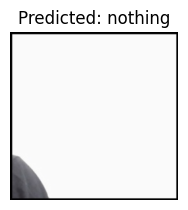

AGHHG


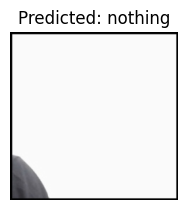

AGHHG


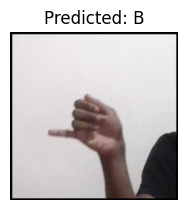

AGHHGB


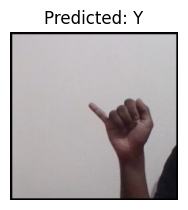

AGHHGBY


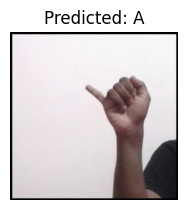

AGHHGBYA


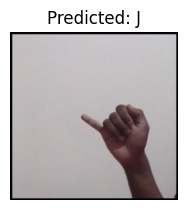

AGHHGBYAJ


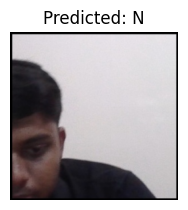

AGHHGBYAJN


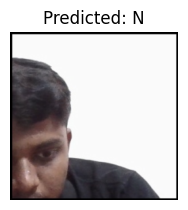

AGHHGBYAJNN


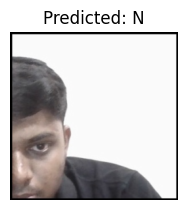

AGHHGBYAJNNN


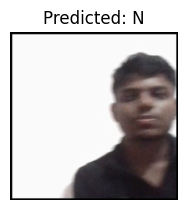

AGHHGBYAJNNNN


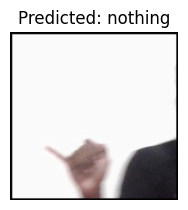

AGHHGBYAJNNNN


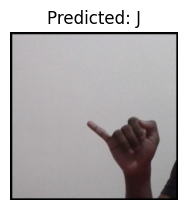

AGHHGBYAJNNNNJ
^C


ModuleNotFoundError: No module named 'playsound'


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7043 sha256=3e6a344dc5f05a6bfb1d843d7e36e758fcd6dcc65348bdc401cccdd59589e263
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\50\98\42\62753a9e1fb97579a0ce2f84f7db4c21c09d03bb2091e6cef4
Successfully built playsound


In [6]:
!pip install gtts
import cv2 
import datetime
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory
from gtts import gTTS 
  

import cv2 
import datetime

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

# define a video capture object 
vid = cv2.VideoCapture(0) 
prev=datetime.datetime.now()
output = cv2.VideoWriter( 
        "output.avi", cv2.VideoWriter_fourcc(*'MPEG'),  
      30, (1080, 1920)) 
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        #transforms.RandomResizedCrop(224),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
data_dir = 'data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
count=0
mode1=torch.load('state_dict_model.pt')
mode1.eval()
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])
def visualize_model_predictions(model,img_path):
    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])
    return class_names[preds[0]]
s=""
while(True): 
      
    # Capture the video frame 
    # by frame 
    ret, frame = vid.read() 

    count+=1
  
    # Display the resulting frame 
    x=300
    h=300
    y=50
    frame=cv2.flip(frame,1)
    cv2.rectangle(frame,(x,y) ,(x+h,y+h),(0,0,0), 5) 
    output.write(frame)
    cv2.imshow('frame', frame) 
    curr=datetime.datetime.now()

    if abs(curr.second-prev.second) > 3:
        prev=curr
        cv2.imwrite('new_frame/frame%d.jpg'%count,frame[y:y+h,x:x+h])
        font = cv2.FONT_HERSHEY_SIMPLEX 
        y=visualize_model_predictions(
        mode1,
        img_path='new_frame/frame%d.jpg'%count
        )
        if y=='space':
            s+=' '
        else :
            if y=='del':
             s=s[:-1]
            else :
             if y != "nothing":
              s+=y
        
        image = cv2.imread("hey.png")
        text = s
        coordinates = (100,100)
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 0.5
        color = (255,0,255)
        thickness = 2
        image = cv2.putText(image, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)
        print(text)
        cv2.imshow("Text", image)
        cv2.imshow('frame', frame)
        cv2.waitKey(2)
         

    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
    
  
myobj = gTTS(text=s, lang='en', slow=False) 
# Saving the converted audio in a mp3 file named 
# welcome  
myobj.save("welcome.mp3") 
  
# Playing the converted file 
os.system("mpg321 welcome.mp3") 
# After the loop release the cap object 
vid.release() 
output.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 



In [2]:

!pip install mediapipe


  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/da/f9/393618415e43f76a694ce8d1c8147ed0ec5f05cecc6cab2e02dcb4a0bc3f/mediapipe-0.10.7-cp311-cp311-win_amd64.whl.metadata
  Using cached mediapipe-0.10.7-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/81/3c/bbb3ceee9fbefc505f98c24dafda68c7b3c4f83b6951c0712b4623fe4cce/opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
  Obtaining dependency information for CFFI>=1.0 from https://files.pythonhosted.org/packages/5a/c7/694814b3757878b29da39bc2f0cf9d20295f4c1e0a0bde7971708d5f23f8/cffi-1.16.0-cp311-cp311-win_amd64.whl.metadata
  Using cached cffi-1.16.0-cp311-cp311-win_amd64.whl.metadata

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\LENOVO\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


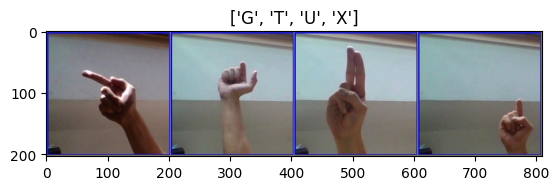

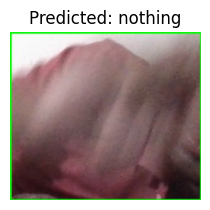


Hand photo with bounding box captured!


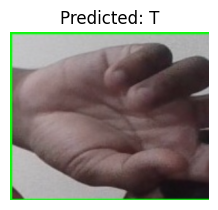

T
Hand photo with bounding box captured!


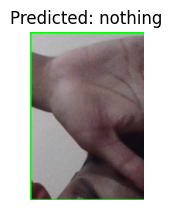

T
Hand photo with bounding box captured!


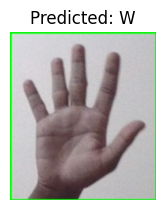

TW
Hand photo with bounding box captured!


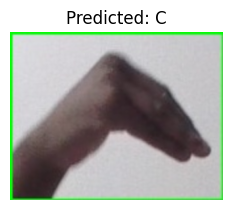

TWC
Hand photo with bounding box captured!


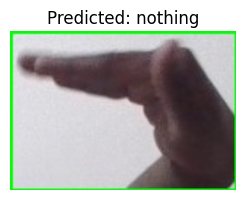

TWC
Hand photo with bounding box captured!


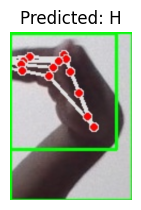

TWCH
Hand photo with bounding box captured!


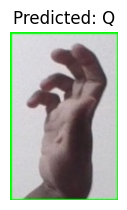

TWCHQ
Hand photo with bounding box captured!


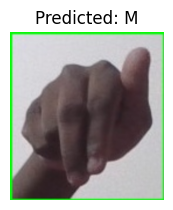

TWCHQM
Hand photo with bounding box captured!


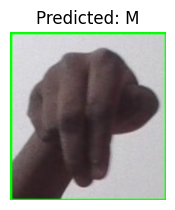

TWCHQMM
Hand photo with bounding box captured!


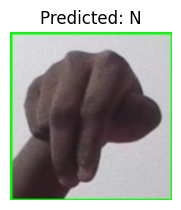

TWCHQMMN
Hand photo with bounding box captured!


In [4]:
import cv2
import numpy as np
import mediapipe as mp
import cv2 
import datetime
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory
from gtts import gTTS 
  

import cv2 
import datetime

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

# define a video capture object 
vid = cv2.VideoCapture(0) 
prev=datetime.datetime.now()
output = cv2.VideoWriter( 
        "output.avi", cv2.VideoWriter_fourcc(*'MPEG'),  
      30, (1080, 1920)) 
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        #transforms.RandomResizedCrop(224),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
data_dir = 'data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
count=0
mode1=torch.load('state_dict_model.pt')
mode1.eval()
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])
def visualize_model_predictions(model,img_path):
    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])
    return class_names[preds[0]]
s=""
cap = cv2.VideoCapture(0)
mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils
detection_interval = 3
prev_detection_time = time.time()
while True:
    current_time = time.time()
    elapsed_time = current_time - prev_detection_time

    if elapsed_time >= detection_interval:
        success, image = cap.read()
        imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(imageRGB)
    # checking whether a hand is detected
        if results.multi_hand_landmarks:
            prev_detection_time = current_time
            for handLms in results.multi_hand_landmarks:  # working with each hand
                bboxCorners = []
                for id, lm in enumerate(handLms.landmark):
                    h, w, c = image.shape
                    cx, cy = int(lm.x * w), int(lm.y * h)
                    bboxCorners.append((cx, cy))

                # Convert bboxCorners to NumPy array
                bboxCorners = np.array(bboxCorners)

                # Draw bounding box around the hand
                x, y, w, h = cv2.boundingRect(bboxCorners)
                cv2.rectangle(image, (x-20, y-20), (x + w+20, y + h+20), (0, 255, 0), 2)
                roi = image[y-20:y + h+20, x-20:x + w+20]
                cv2.imwrite('new_frame/frame%d.jpg'%2,roi)
                font = cv2.FONT_HERSHEY_SIMPLEX 
                y=visualize_model_predictions(
                mode1,
                img_path='new_frame/frame%d.jpg'%2
                )
                if y=='space':
                    s+=' '
                else :
                    if y=='del':
                     s=s[:-1]
                    else :
                     if y != "nothing":
                      s+=y
                
                image1 = cv2.imread("hey.png")
                text = s
                coordinates = (100,100)
                font = cv2.FONT_HERSHEY_SIMPLEX
                fontScale = 0.5
                color = (255,0,255)
                thickness = 2
                image1 = cv2.putText(image1, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)
                print(text)
                cv2.imshow("Text", image1)

                mpDraw.draw_landmarks(image, handLms, mpHands.HAND_CONNECTIONS)

                # Capture an image when a hand is detected
                cv2.imwrite("hand_photo_with_bbox.jpg", roi)
                print("Hand photo with bounding box captured!")

        cv2.imshow("Output", image)

        # Break the loop if the 'Esc' key is pressed
        if cv2.waitKey(1) == 27:
            break

cap.release()
cv2.destroyAllWindows()
